
Project: Predicting Customer Churn Using Machine Learning
Objective
Develop a machine learning model to predict whether a customer will churn (stop using the service) based on their usage data.




Problem Definition
Goal: Predict customer churn to help businesses implement retention strategies.
Output: A binary classification (Churn: Yes/No).

In [3]:
from google.colab import files

uploaded = files.upload()


Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [4]:
import pandas as pd
df = pd.read_csv("Telco-Customer-Churn.csv")

In [ ]:
df.isnull().sum()



,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df_numeric = df.select_dtypes(include='number')

In [8]:
df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())


In [9]:
df_categorical = df.select_dtypes(exclude='number')

In [10]:
df[df_categorical.columns] = df_categorical.fillna('Unknown')

In [11]:
df = pd.get_dummies(df, drop_first=True)

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
print(df.columns)


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'customerID_0003-MKNFE',
       'customerID_0004-TLHLJ', 'customerID_0011-IGKFF',
       'customerID_0013-EXCHZ', 'customerID_0013-MHZWF',
       'customerID_0013-SMEOE', 'customerID_0014-BMAQU',
       ...
       'TotalCharges_996.45', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'Churn_Yes'],
      dtype='object', length=13602)


In [16]:
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model building

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [20]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
y_pred = model.predict(X_test)


Model Evaluation

In [23]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.8034066713981547


Model Optimization

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None]
}

In [26]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': None, 'n_estimators': 300}


Deployment and Insights

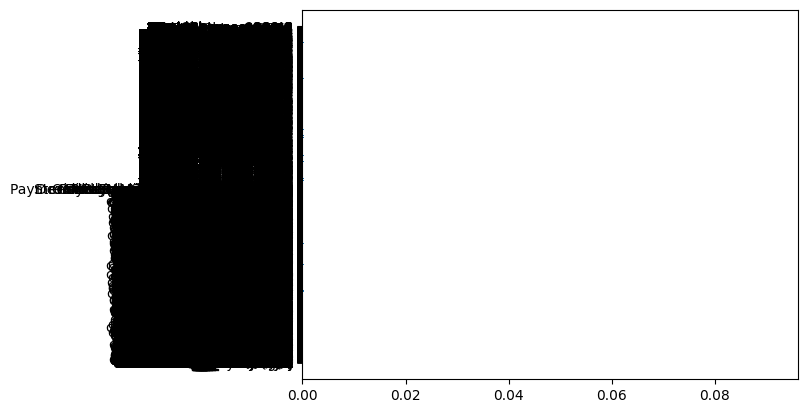

In [27]:
import matplotlib.pyplot as plt
feature_importances = model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.show()
